In [1]:
import numpy as np
import itertools
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix,precision_score, recall_score

#Generating dataset
# Define the set of digits (0 and 1)
digits = ['0', '1']

# Generate all possible combinations
combinations = list(itertools.product(digits, repeat=10))

# Convert the tuples to strings for better readability
combinations = [''.join(combination) for combination in combinations]

# Create a DataFrame
df_final = pd.DataFrame({'combinations': combinations})

# Add a column for the target values (0 or 1)
df_final['target'] = df_final['combinations'].apply(lambda x: 0 if x != x[::-1] else 1)

# Print the DataFrame
# print(df_final)

#Splitting dataset into train and test dataset
# Randomly select 500 rows with target=1
df_target_1_sampled = df_final[df_final['target'] == 1].sample(n=10, random_state=42)

# Randomly select 500 rows with target=0
df_target_0_sampled = df_final[df_final['target'] == 0].sample(n=10, random_state=42)

# Combine the sampled dataframes
final_sampled_dataframe = pd.concat([df_target_1_sampled, df_target_0_sampled])

# Extract the indices of the sampled rows
sampled_indices = final_sampled_dataframe.index

# Create a dataframe with the remaining rows (not part of the sampled rows)
df_remaining_rows = df_final[~df_final.index.isin(sampled_indices)]

# Display the shapes of the final sampled dataframe and the dataframe with remaining rows
# print("Final sampled dataframe shape:", final_sampled_dataframe.shape)
# print("Remaining rows dataframe shape:", df_remaining_rows.shape)

# Shuffle the rows in final_sampled_dataframe
shuffled_final_sampled_dataframe = final_sampled_dataframe.sample(frac=1.0, random_state=42)

# Display the first few rows of the shuffled dataframe
# print(shuffled_final_sampled_dataframe.head())

# Shuffle the values in df_remaining_rows
df_remaining_rows_shuffled = df_remaining_rows.sample(frac=1, random_state=42)

df_remaining_rows_shuffled

# Assuming df_remaining_rows and final_sampled_dataframe are the dataframes from the previous code

# Extract features and target from df_remaining_rows
X_train = df_remaining_rows_shuffled.drop('target', axis=1)
y_train_final = df_remaining_rows_shuffled['target']

# Extract features and target from final_sampled_dataframe
X_test = shuffled_final_sampled_dataframe.drop('target', axis=1)
y_test_final = shuffled_final_sampled_dataframe['target']

# Display the shapes of the extracted sets
# print("X_train shape:", X_train.shape, "y_train shape:", y_train_final.shape)
# print("X_test shape:", X_test.shape, "y_test shape:", y_test_final.shape)


X_train_final = np.array([list(map(int, str(row))) for row in X_train['combinations']])
X_test_final = np.array([list(map(int, str(row))) for row in X_test['combinations']])

# Check the shape
# print(X_test_final.shape)  # Output: (1004, 10)

# Convert to 2D array
y_train_final = y_train_final.values.reshape(-1, 1)  # Using values attribute and reshape
y_test_final = y_test_final.values.reshape(-1, 1)  # Using values attribute and reshape


# Print the shape of the resulting array
# print(y_test_final.shape)

#Transforming X,y for trainable values
X = X_train_final.T
Y = y_train_final.reshape(1, len(y_train_final))

# print(X.shape)
# print(Y.shape)

X_test = X_test_final.T
Y_test = y_test_final.reshape(1, len(y_test_final))

# print(X_test.shape)
# print(Y_test.shape)


#Neural Network code
def sigmoid(z):
    sigmoid = 1 / (1 + np.exp(-z))
    return sigmoid

def tanh(z):
    tan = (np.exp(z) - np.exp(-z)) / (np.exp(z) + np.exp(-z))
    return tan

def layer_sizes(X, Y):
    n_x = X.shape[0]
    n_h = 5
    n_y = Y.shape[0]

    return n_x, n_h, n_y

def initialize_params(n_x, n_h, n_y):

    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))

    return W1, b1, W2, b2

def forward_propagation(X, W1, b1, W2, b2):
    
    Z1 = np.dot(W1, X) + b1
    A1 = tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)

    return Z1, A1, Z2, A2

def compute_cost(Y, A2):

    m = Y.shape[1]
    cost = (-1/m) * np.sum(np.multiply(Y ,np.log(A2)) + np.multiply((1-Y), np.log(1-A2)))
    cost = float(np.squeeze(cost))
    return cost

def backward_propagation(X, Y, W1, b1, W2, b2, Z1, A1, Z2, A2):
    
    m = X.shape[0] # Number of training examples

    dZ2 = A2 - Y
    dW2 = (1/m) * np.dot(dZ2, A1.T)
    db2 = (1/m) * (np.sum(dZ2, axis = 1, keepdims = True))
    
    dZ1 = np.dot(W2.T, dZ2) * (1 - np.power(A1, 2))
    dW1 = (1/m) * (np.dot(dZ1, X.T))
    db1 = (1/m) * (np.sum(dZ1, axis = 1, keepdims = True))
    
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):

    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2

    return W1, b1, W2, b2

def neural_network(X, Y, n_h, learning_rate,param_list, num_iterations = 1000):
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    costs = []
    # Initialize parameters
    W1, b1, W2, b2 = initialize_params(n_x, n_h, n_y)

    
    # Loop (gradient descent)
    for i in range(0, num_iterations):
        Z1, A1, Z2, A2 = forward_propagation(X, W1, b1, W2, b2)
        cost = compute_cost(Y, A2)
        if i % 10 == 0:
            costs.append(cost)
        dW1, db1, dW2, db2 = backward_propagation(X, Y, W1, b1, W2, b2, Z1, A1, Z2, A2)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)
        
    params_to_append = [W1,b1,W2,b2] 
    param_list += params_to_append
    return param_list, costs


def predict(W1, b1, W2, b2, X):

    Z1, A1, Z2, A2 = forward_propagation(X, W1, b1, W2, b2)

    m = X.shape[1]
    y_pred = np.zeros((1, m))
    for i in range(A2.shape[1]):
        if A2[0, i] >= 0.5:
            y_pred[0, i] = 1
        else:
            y_pred[0, i] = 0

    return y_pred

param_list = []
neural_network(X,Y,5,0.1,param_list,1000)

final_prediction = predict(param_list[0],param_list[1],param_list[2],param_list[3],X_test,)
final_y = final_prediction.T
final_y.shape


# Calculate accuracy on the test set
accuracy = accuracy_score(y_test_final, final_y)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Calculate F1 score on the test set
f1 = f1_score(y_test_final, final_y)
print(f"F1 Score: {f1:.2f}")

# Generate and print confusion matrix
conf_matrix = confusion_matrix(y_test_final, final_y)
print("Confusion Matrix:")
print(conf_matrix)


# Assuming y_test_final and final_y are your true labels and predicted labels respectively
precision = precision_score(y_test_final, final_y)

print("Precision:", precision)
print(f"Precision: {precision * 100:.2f}%")

C:\Users\anand\AppData\Roaming\Python\Python310\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Accuracy: 80.00%
F1 Score: 0.75
Confusion Matrix:
[[10  0]
 [ 4  6]]
Precision: 1.0
Precision: 100.00%


In [3]:
import numpy as np
import itertools
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score

# Generating dataset
digits = ['0', '1']  
combinations = list(itertools.product(digits, repeat=10))  
combinations = [''.join(combination) for combination in combinations]  
df_final = pd.DataFrame({'combinations': combinations})  
df_final['target'] = df_final['combinations'].apply(lambda x: 0 if x != x[::-1] else 1)  

# Splitting dataset into train and test dataset
df_target_1_sampled = df_final[df_final['target'] == 1].sample(n=10, random_state=42)  
df_target_0_sampled = df_final[df_final['target'] == 0].sample(n=10, random_state=42)  
final_sampled_dataframe = pd.concat([df_target_1_sampled, df_target_0_sampled])  

sampled_indices = final_sampled_dataframe.index  
df_remaining_rows = df_final[~df_final.index.isin(sampled_indices)]  

shuffled_final_sampled_dataframe = final_sampled_dataframe.sample(frac=1.0, random_state=42)  
df_remaining_rows_shuffled = df_remaining_rows.sample(frac=1, random_state=42)  

# Extract features and target from dataframes
X_train = df_remaining_rows_shuffled.drop('target', axis=1)
y_train_final = df_remaining_rows_shuffled['target']
X_test = shuffled_final_sampled_dataframe.drop('target', axis=1)
y_test_final = shuffled_final_sampled_dataframe['target']

X_train_final = np.array([list(map(int, str(row))) for row in X_train['combinations']])  
X_test_final = np.array([list(map(int, str(row))) for row in X_test['combinations']])  

y_train_final = y_train_final.values.reshape(-1, 1)  
y_test_final = y_test_final.values.reshape(-1, 1)  

X = X_train_final.T  
Y = y_train_final.reshape(1, len(y_train_final))  

X_test = X_test_final.T  
Y_test = y_test_final.reshape(1, len(y_test_final))  

# Neural Network code
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def layer_sizes(X, Y):
    n_x = X.shape[0]
    n_h = 5
    n_y = Y.shape[0]
    return n_x, n_h, n_y

def initialize_params(n_x, n_h, n_y):
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))
    return W1, b1, W2, b2

def forward_propagation(X, W1, b1, W2, b2):
    Z1 = np.dot(W1, X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    return Z1, A1, Z2, A2

def compute_cost(Y, A2):
    m = Y.shape[1]
    cost = (-1/m) * np.sum(np.multiply(Y, np.log(A2)) + np.multiply((1-Y), np.log(1-A2)))
    cost = float(np.squeeze(cost))
    return cost

def backward_propagation(X, Y, W1, b1, W2, b2, Z1, A1, Z2, A2):
    m = X.shape[0]  
    dZ2 = A2 - Y
    dW2 = (1/m) * np.dot(dZ2, A1.T)
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.dot(W2.T, dZ2) * (A1 * (1 - A1))  # derivative of sigmoid
    dW1 = (1/m) * np.dot(dZ1, X.T)
    db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    return W1, b1, W2, b2

def neural_network(X, Y, n_h, learning_rate, param_list, num_iterations=1000):
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    costs = []
    W1, b1, W2, b2 = initialize_params(n_x, n_h, n_y)  
    for i in range(num_iterations):  
        Z1, A1, Z2, A2 = forward_propagation(X, W1, b1, W2, b2)
        cost = compute_cost(Y, A2)
        if i % 10 == 0:
            costs.append(cost)
        dW1, db1, dW2, db2 = backward_propagation(X, Y, W1, b1, W2, b2, Z1, A1, Z2, A2)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)
    params_to_append = [W1, b1, W2, b2] 
    param_list += params_to_append
    return param_list, costs

def predict(W1, b1, W2, b2, X):
    Z1, A1, Z2, A2 = forward_propagation(X, W1, b1, W2, b2)
    m = X.shape[1]
    y_pred = np.zeros((1, m))
    for i in range(A2.shape[1]):
        y_pred[0, i] = 1 if A2[0, i] >= 0.5 else 0
    return y_pred

param_list = []
neural_network(X, Y, 5, 0.1, param_list, 1000)

final_prediction = predict(param_list[0], param_list[1], param_list[2], param_list[3], X_test)
final_y = final_prediction.T
print("y_pred:",final_y)
print("y:",y_test_final)

# Calculate accuracy on the test set
accuracy = accuracy_score(y_test_final, final_y)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Calculate F1 score on the test set
f1 = f1_score(y_test_final, final_y)
print(f"F1 Score: {f1:.2f}")

# Generate and print confusion matrix
conf_matrix = confusion_matrix(y_test_final, final_y)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate precision
precision = precision_score(y_test_final, final_y)
print("Precision:", precision)
print(f"Precision: {precision * 100:.2f}%")

recall = recall_score(y_test_final, final_y)
print("Recall:", recall)
print(f"Recall: {recall * 100:.2f}%")

y_pred: [[0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]]
y: [[1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]]
Accuracy: 65.00%
F1 Score: 0.46
Confusion Matrix:
[[10  0]
 [ 7  3]]
Precision: 1.0
Precision: 100.00%
Recall: 0.3
Recall: 30.00%


Number of 1s in the dataset: 25
y_train_shape: (819,)
final_y_ones: 0
y_test_ones: 7
Number of 1s in the dataset: 25
y_train_shape: (819,)


C:\Users\anand\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


final_y_ones: 7
y_test_ones: 7
Number of 1s in the dataset: 26
y_train_shape: (819,)
final_y_ones: 3
y_test_ones: 6
Number of 1s in the dataset: 26
y_train_shape: (819,)
final_y_ones: 3
y_test_ones: 6
Number of 1s in the dataset: 26
y_train_shape: (820,)
final_y_ones: 6
y_test_ones: 6
accuracies: [0.9658536585365853, 1.0, 0.975609756097561, 0.975609756097561, 1.0]
f1_scores: [0.0, 1.0, 0.4444444444444444, 0.4444444444444444, 1.0]
precisions: [0.0, 1.0, 0.6666666666666666, 0.6666666666666666, 1.0]
recalls: [0.0, 1.0, 0.3333333333333333, 0.3333333333333333, 1.0]
Average Accuracy: 98.34%
Average F1 Score: 0.58
Average Confusion Matrix:
[[198.    0.4]
 [  3.    3.4]]
Average Precision: 66.67%
Average Recall: 53.33%


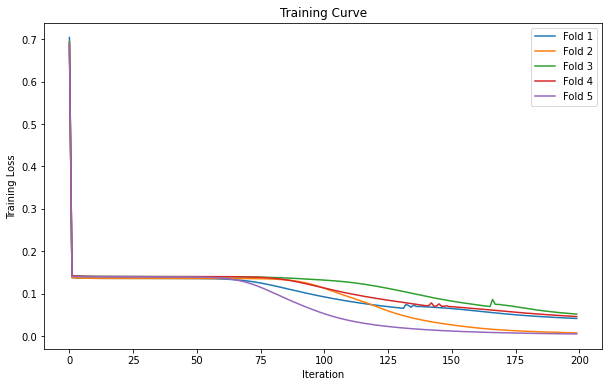

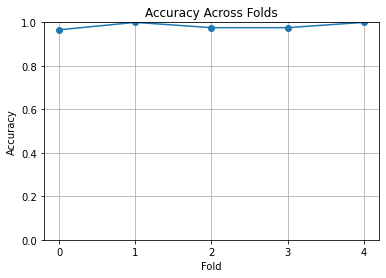

In [5]:
import numpy as np
import itertools
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt

# Generating dataset
digits = ['0', '1']  
combinations = list(itertools.product(digits, repeat=10))  
combinations = [''.join(combination) for combination in combinations]  
df_final = pd.DataFrame({'combinations': combinations})  
df_final['target'] = df_final['combinations'].apply(lambda x: 0 if x != x[::-1] else 1)  

# Define features and target
X = np.array([list(map(int, str(row))) for row in df_final['combinations']])
y = df_final['target'].values

# Neural Network code
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def layer_sizes(X, Y):
    n_x = X.shape[0]
    n_h = 5
    n_y = Y.shape[0]
    return n_x, n_h, n_y

def initialize_params(n_x, n_h, n_y):
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))
    return W1, b1, W2, b2

def forward_propagation(X, W1, b1, W2, b2):
    Z1 = np.dot(W1, X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    return Z1, A1, Z2, A2

def compute_cost(Y, A2):
    m = Y.shape[1]
    cost = (-1/m) * np.sum(np.multiply(Y, np.log(A2)) + np.multiply((1-Y), np.log(1-A2)))
    cost = float(np.squeeze(cost))
    return cost

def backward_propagation(X, Y, W1, b1, W2, b2, Z1, A1, Z2, A2):
    m = X.shape[0]  
    dZ2 = A2 - Y
    dW2 = (1/m) * np.dot(dZ2, A1.T)
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.dot(W2.T, dZ2) * (A1 * (1 - A1))  # derivative of sigmoid
    dW1 = (1/m) * np.dot(dZ1, X.T)
    db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    return W1, b1, W2, b2

def neural_network(X, Y, n_h, learning_rate, param_list, num_iterations=1000):
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    costs = []
    W1, b1, W2, b2 = initialize_params(n_x, n_h, n_y)  
    for i in range(num_iterations):  
        Z1, A1, Z2, A2 = forward_propagation(X, W1, b1, W2, b2)
        cost = compute_cost(Y, A2)
        if i % 10 == 0:
            costs.append(cost)
        dW1, db1, dW2, db2 = backward_propagation(X, Y, W1, b1, W2, b2, Z1, A1, Z2, A2)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)
    params_to_append = [W1, b1, W2, b2] 
    param_list += params_to_append
    return param_list, costs

def predict(W1, b1, W2, b2, X):
    Z1, A1, Z2, A2 = forward_propagation(X, W1, b1, W2, b2)
    m = X.shape[1]
    y_pred = np.zeros((1, m))
    for i in range(A2.shape[1]):
        y_pred[0, i] = 1 if A2[0, i] >= 0.5 else 0
    return y_pred

# Initialize Stratified k-fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store evaluation metrics
accuracies = []
f1_scores = []
conf_matrices = []
precisions = []
recalls = []
train_losses = []

# Perform cross-validation
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    num_ones = np.count_nonzero(y_train == 1)
    print("Number of 1s in the dataset:", num_ones)
    print("y_train_shape:",y_train.shape)

    # Train model
    param_list = []
    _, costs = neural_network(X_train.T, y_train.reshape(1, -1), 3, 0.1, param_list, 2000)
    train_losses.append(costs)

    # Make predictions
    final_prediction = predict(param_list[0], param_list[1], param_list[2], param_list[3], X_test.T)
    final_y = final_prediction.T
    print("final_y_ones:",np.count_nonzero(final_y == 1))
    print("y_test_ones:",np.count_nonzero(y_test == 1))

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, final_y)
    f1 = f1_score(y_test, final_y)
    conf_matrix = confusion_matrix(y_test, final_y)
    precision = precision_score(y_test, final_y)
    recall = recall_score(y_test, final_y)

    # Append metrics to lists
    accuracies.append(accuracy)
    f1_scores.append(f1)
    conf_matrices.append(conf_matrix)
    precisions.append(precision)
    recalls.append(recall)

# Calculate average metrics
print("accuracies:",accuracies)
print("f1_scores:",f1_scores)
print("precisions:",precisions)
print("recalls:",recalls)
avg_accuracy = np.mean(accuracies)
avg_f1 = np.mean(f1_scores)
avg_precision = np.mean(precisions)
avg_recall = np.mean(recalls)

# Print average metrics
print(f"Average Accuracy: {avg_accuracy * 100:.2f}%")
print(f"Average F1 Score: {avg_f1:.2f}")
print("Average Confusion Matrix:")
print(np.mean(conf_matrices, axis=0))
print(f"Average Precision: {avg_precision * 100:.2f}%")
print(f"Average Recall: {avg_recall * 100:.2f}%")

# Plot training curve
plt.figure(figsize=(10, 6))
for i, loss in enumerate(train_losses):
    plt.plot(loss, label=f'Fold {i+1}')
plt.xlabel('Iteration')
plt.ylabel('Training Loss')
plt.title('Training Curve')
plt.legend()
plt.show()

# Plot accuracies
plt.figure(figsize=(6, 4))
plt.plot(accuracies, marker='o', linestyle='-')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Accuracy Across Folds')
plt.xticks(range(len(accuracies)))
plt.ylim(0, 1)
plt.grid(True)
plt.show()

In [7]:
X_test_1 = np.array([[0],[1],[0],[0],[1],[0],[1],[0],[0],[0]])
final_prediction = predict(param_list[0], param_list[1], param_list[2], param_list[3], X_test_1)
print(final_prediction)

[[0.]]


## Manually splitting the dataset and perform backpropagation

In [447]:
import itertools
import pandas as pd

# Define the set of digits (0 and 1)
digits = ['0', '1']

# Generate all possible combinations
combinations = list(itertools.product(digits, repeat=10))

# Convert the tuples to strings for better readability
combinations = [''.join(combination) for combination in combinations]

# Create a DataFrame
df_final = pd.DataFrame({'combinations': combinations})

# Add a column for the target values (0 or 1)
df_final['target'] = df_final['combinations'].apply(lambda x: 0 if x != x[::-1] else 1)

# Print the DataFrame
print(df_final)



     combinations  target
0      0000000000       1
1      0000000001       0
2      0000000010       0
3      0000000011       0
4      0000000100       0
...           ...     ...
1019   1111111011       0
1020   1111111100       0
1021   1111111101       0
1022   1111111110       0
1023   1111111111       1

[1024 rows x 2 columns]


In [451]:
num_ones = df_final['target'].sum()
num_ones

32

In [212]:
import pandas as pd

# Randomly select 500 rows with target=1
df_target_1_sampled = df_final[df_final['target'] == 1].sample(n=10, random_state=42)

# Randomly select 500 rows with target=0
df_target_0_sampled = df_final[df_final['target'] == 0].sample(n=10, random_state=42)

# Combine the sampled dataframes
final_sampled_dataframe = pd.concat([df_target_1_sampled, df_target_0_sampled])

# Extract the indices of the sampled rows
sampled_indices = final_sampled_dataframe.index

# Create a dataframe with the remaining rows (not part of the sampled rows)
df_remaining_rows = df_final[~df_final.index.isin(sampled_indices)]

# Display the shapes of the final sampled dataframe and the dataframe with remaining rows
print("Final sampled dataframe shape:", final_sampled_dataframe.shape)
print("Remaining rows dataframe shape:", df_remaining_rows.shape)


Final sampled dataframe shape: (20, 2)
Remaining rows dataframe shape: (1004, 2)


In [213]:
# Shuffle the rows in final_sampled_dataframe
shuffled_final_sampled_dataframe = final_sampled_dataframe.sample(frac=1.0, random_state=42)

# Display the first few rows of the shuffled dataframe
print(shuffled_final_sampled_dataframe.head())

    combinations  target
951   1110110111       1
110   0001101110       0
552   1000101000       0
510   0111111110       1
390   0110000110       1


In [214]:
# Shuffle the values in df_remaining_rows
df_remaining_rows_shuffled = df_remaining_rows.sample(frac=1, random_state=42)

df_remaining_rows_shuffled

,combinations,target
944,1110110000,0
646,1010000110,0
698,1010111010,0
528,1000010000,0
375,0101110111,0
...,...,...
109,0001101101,0
276,0100010100,0
878,1101101110,0
446,0110111110,0


In [215]:
shuffled_final_sampled_dataframe

,combinations,target
951,1110110111,1
110,0001101110,0
552,1000101000,0
510,0111111110,1
390,0110000110,1
306,0100110010,1
342,0101010110,0
561,1000110001,1
61,0000111101,0
289,0100100001,0


In [216]:
# Assuming df_remaining_rows and final_sampled_dataframe are the dataframes from the previous code

# Extract features and target from df_remaining_rows
X_train = df_remaining_rows_shuffled.drop('target', axis=1)
y_train_final = df_remaining_rows_shuffled['target']

# Extract features and target from final_sampled_dataframe
X_test = shuffled_final_sampled_dataframe.drop('target', axis=1)
y_test_final = shuffled_final_sampled_dataframe['target']

# Display the shapes of the extracted sets
print("X_train shape:", X_train.shape, "y_train shape:", y_train_final.shape)
print("X_test shape:", X_test.shape, "y_test shape:", y_test_final.shape)


X_train shape: (1004, 1) y_train shape: (1004,)
X_test shape: (20, 1) y_test shape: (20,)


In [217]:
X_train

,combinations
944,1110110000
646,1010000110
698,1010111010
528,1000010000
375,0101110111
...,...
109,0001101101
276,0100010100
878,1101101110
446,0110111110


In [218]:
y_train_final

944    0
646    0
698    0
528    0
375    0
      ..
109    0
276    0
878    0
446    0
105    0
Name: target, Length: 1004, dtype: int64

In [219]:
X_train_final = np.array([list(map(int, str(row))) for row in X_train['combinations']])
X_test_final = np.array([list(map(int, str(row))) for row in X_test['combinations']])

# Check the shape
print(X_test_final.shape)  # Output: (1004, 10)

(20, 10)


In [220]:
X_train_final

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 0, 1, ..., 1, 1, 0],
       [1, 0, 1, ..., 0, 1, 0],
       ...,
       [1, 1, 0, ..., 1, 1, 0],
       [0, 1, 1, ..., 1, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]])

In [221]:
X_train_final.shape[0]

1004

In [222]:
# Convert to 2D array
y_train_final = y_train_final.values.reshape(-1, 1)  # Using values attribute and reshape
y_test_final = y_test_final.values.reshape(-1, 1)  # Using values attribute and reshape


# Print the shape of the resulting array
print(y_test_final.shape)

(20, 1)


In [223]:
y_train_final

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [224]:
type(y_train_final)

numpy.ndarray

In [225]:
y_train_final.shape[0]

1004

In [226]:
X = X_train_final.T
Y = y_train_final.reshape(1, len(y_train_final))

print(X.shape)
print(Y.shape)

(10, 1004)
(1, 1004)


In [293]:
import numpy as np
import pandas as pd

def sigmoid(z):
    sigmoid = 1 / (1 + np.exp(-z))
    return sigmoid

def tanh(z):
    tan = (np.exp(z) - np.exp(-z)) / (np.exp(z) + np.exp(-z))
    return tan

def layer_sizes(X, Y):
    n_x = X.shape[0]
    n_h = 5
    n_y = Y.shape[0]

    return n_x, n_h, n_y

def initialize_params(n_x, n_h, n_y):

    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))

    return W1, b1, W2, b2

def forward_propagation(X, W1, b1, W2, b2):
    
    Z1 = np.dot(W1, X) + b1
    A1 = tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)

    return Z1, A1, Z2, A2

def compute_cost(Y, A2):

    m = Y.shape[1]
    cost = (-1/m) * np.sum(np.multiply(Y ,np.log(A2)) + np.multiply((1-Y), np.log(1-A2)))
    cost = float(np.squeeze(cost))
    return cost

def backward_propagation(X, Y, W1, b1, W2, b2, Z1, A1, Z2, A2):
    
    m = X.shape[0] # Number of training examples

    dZ2 = A2 - Y
    dW2 = (1/m) * np.dot(dZ2, A1.T)
    db2 = (1/m) * (np.sum(dZ2, axis = 1, keepdims = True))
    
    dZ1 = np.dot(W2.T, dZ2) * (1 - np.power(A1, 2))
    dW1 = (1/m) * (np.dot(dZ1, X.T))
    db1 = (1/m) * (np.sum(dZ1, axis = 1, keepdims = True))
    
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):

    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2

    return W1, b1, W2, b2

def neural_network(X, Y, n_h, learning_rate,param_list, num_iterations = 1000):
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    costs = []
    # Initialize parameters
    W1, b1, W2, b2 = initialize_params(n_x, n_h, n_y)

    
    # Loop (gradient descent)
    for i in range(0, num_iterations):
        Z1, A1, Z2, A2 = forward_propagation(X, W1, b1, W2, b2)
        cost = compute_cost(Y, A2)
        if i % 10 == 0:
            costs.append(cost)
        dW1, db1, dW2, db2 = backward_propagation(X, Y, W1, b1, W2, b2, Z1, A1, Z2, A2)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)
        
    params_to_append = [W1,b1,W2,b2] 
    param_list += params_to_append
    return param_list, costs

In [406]:
param_list = []
neural_network(X,Y,5,0.1,param_list,1000)

([array([[ 0.76207697,  2.28557819,  1.40359269, -1.40882403,  0.28326989,
          -0.30482446,  1.488074  , -0.32096213,  1.75763597, -0.77955669],
         [ 0.63850363,  0.21862061, -2.75861261,  1.29167773,  0.31298239,
          -0.34433463,  1.98098418, -3.17526681,  1.03738592, -0.66709019],
         [ 2.00151387, -5.43224335,  1.6064584 , -2.4667495 , -0.21669178,
           0.20369718,  2.39941614, -1.56819849, -5.04059559, -2.01086294],
         [ 2.35283323, -0.26190417, -1.99871369,  4.17025146, -2.86328103,
           2.8832425 , -4.27549952,  2.45508875,  0.40226649, -2.33226441],
         [ 5.68065103, -1.38935915,  0.57805217,  0.43292817, -2.97397262,
           2.94223604, -0.31273804, -0.96581212,  0.99196538, -5.70147505]]),
  array([[-4.40655304],
         [-3.7799057 ],
         [ 1.00235453],
         [ 1.1988689 ],
         [-1.37144705]]),
  array([[ 5.82669857,  4.60957543,  6.2607946 ,  6.21004007, -7.46375778]]),
  array([[-3.85762103]])],
 [0.693069344001

In [407]:
param_list[0].shape

(5, 10)

In [408]:
param_list[1].shape

(5, 1)

In [409]:
param_list[2].shape

(1, 5)

In [410]:
param_list[3].shape

(1, 1)

In [411]:
def predict(W1, b1, W2, b2, X):

    Z1, A1, Z2, A2 = forward_propagation(X, W1, b1, W2, b2)

    m = X.shape[1]
    y_pred = np.zeros((1, m))
    for i in range(A2.shape[1]):
        if A2[0, i] >= 0.5:
            y_pred[0, i] = 1
        else:
            y_pred[0, i] = 0

    return y_pred

In [412]:
X.shape[1]

1004

In [413]:
X_test = X_test_final.T
Y_test = y_test_final.reshape(1, len(y_test_final))

print(X_test.shape)
print(Y_test.shape)

(10, 20)
(1, 20)


In [414]:
final_prediction = predict(param_list[0],param_list[1],param_list[2],param_list[3],X_test,)
final_y = final_prediction.T
final_y.shape

In [415]:
final_y = final_prediction.T
final_y.shape

(20, 1)

In [416]:
y_test_final.shape

(20, 1)

In [417]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix,precision_score
# Calculate accuracy on the test set
accuracy = accuracy_score(y_test_final, final_y)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 80.00%


In [418]:
# Calculate accuracy on the test set
accuracy = accuracy_score(y_test_final, final_y)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Calculate F1 score on the test set
f1 = f1_score(y_test_final, final_y)
print(f"F1 Score: {f1:.2f}")

# Generate and print confusion matrix
conf_matrix = confusion_matrix(y_test_final, final_y)
print("Confusion Matrix:")
print(conf_matrix)


# Assuming y_test_final and final_y are your true labels and predicted labels respectively
precision = precision_score(y_test_final, final_y)

print("Precision:", precision)
print(f"Precision: {precision * 100:.2f}%")

F1 Score: 0.75
Confusion Matrix:
[[10  0]
 [ 4  6]]


In [419]:
# Assuming y_test_final and final_y are your true labels and predicted labels respectively
precision = precision_score(y_test_final, final_y)

print("Precision:", precision)
print(f"Precision: {precision * 100:.2f}%")

Precision: 1.0
Precision: 100.00%
